In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier        #Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import export_graphviz
import matplotlib.pylab as plt
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB             #Naive Bayes
import numpy as np
import pandas as pd
import graphviz
%matplotlib inline

In [2]:
df_covid=pd.read_csv('COVID-19_formatted_dataset.csv', index_col=0)

In [3]:
df_covid.head()

,Patient age quantile,SARS-Cov-2 exam result,Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW)
1,17,negative,0.236515,-0.022340,-0.517413,0.010677,0.102004,0.318366,-0.950790,-0.094610,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073
8,1,negative,-1.571682,-0.774212,1.429667,-1.672222,-0.850035,-0.005738,3.331071,0.364550,-0.223767,0.178175,1.018625,-1.336024,0.068652,-0.978899
15,9,negative,-0.747693,-0.586244,-0.429480,-0.213711,-1.361315,-1.114514,0.542882,-0.884923,0.081693,1.746323,-0.666950,1.668409,1.276759,-1.067355
18,11,negative,0.991838,0.792188,0.072992,-0.550290,0.542763,0.045436,-0.452899,-0.211488,-0.834685,0.334989,-0.709090,0.606842,-0.220244,0.171035
22,9,negative,0.190738,-0.147652,-0.668155,1.020415,-0.127191,0.002791,-1.249524,-1.132592,0.387152,-0.083183,-0.709090,0.566783,2.012129,0.613318


In [4]:
df_covid.shape

(598, 16)

In [5]:
df_covid['SARS-Cov-2 exam result'] = df_covid['SARS-Cov-2 exam result'].map({'negative': 0, 'positive': 1})

In [6]:
df_covid['SARS-Cov-2 exam result']

1       0
8       0
15      0
18      0
22      0
       ..
5602    0
5614    0
5615    0
5618    0
5643    1
Name: SARS-Cov-2 exam result, Length: 598, dtype: int64

In [7]:
X = df_covid.drop('SARS-Cov-2 exam result', axis =1).values

In [8]:
X.shape

(598, 15)

In [9]:
Y = df_covid['SARS-Cov-2 exam result'].values
Y[:5]

array([0, 0, 0, 0, 0])

In [10]:
df= df_covid.values
type(df)

numpy.ndarray

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train,X_test, Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [13]:
Feature = list(df_covid.columns)

Feature.remove('SARS-Cov-2 exam result')

Feature

['Patient age quantile',
 'Hematocrit',
 'Hemoglobin',
 'Platelets',
 'Mean platelet volume ',
 'Red blood Cells',
 'Lymphocytes',
 'Mean corpuscular hemoglobin concentration\xa0(MCHC)',
 'Leukocytes',
 'Basophils',
 'Mean corpuscular hemoglobin (MCH)',
 'Eosinophils',
 'Mean corpuscular volume (MCV)',
 'Monocytes',
 'Red blood cell distribution width (RDW)']

## Naive Bayes

#### Generating model using GauusianNB

In [15]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [16]:
naives_model = GaussianNB()
naives_model.fit(X_train,Y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [17]:
Y_hat = naives_model.predict(X_test)
Y_hat

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1])

In [18]:
model_acc = accuracy_score(Y_test, Y_hat)
print('The accuracy of our naive model is: %0.2f'% model_acc)

The accuracy of our naive model is: 0.72


The accuracy of our confusion matrix is:
 [[78 29]
 [ 5  8]]


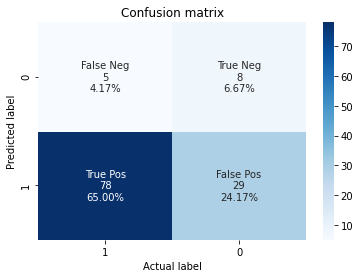

In [19]:
model_conf = confusion_matrix(Y_test, Y_hat)
model_conf
print('The accuracy of our confusion matrix is:\n', model_conf)
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                model_conf.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     model_conf.flatten()/np.sum(model_conf)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(model_conf, annot=labels, fmt='', cmap='Blues')
plt.xticks([0.5,1.5],labels=[1,0])
plt.yticks([0.5,1.5],labels=[1,0])
ax.set_ylim([0,2])
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()


Feature: Patient age quantile Score: -0.03000
Feature: Hematocrit Score: -0.06167
Feature: Hemoglobin Score: -0.08167
Feature: Platelets Score: -0.05167
Feature: Mean platelet volume  Score: -0.03167
Feature: Red blood Cells Score: -0.05500
Feature: Lymphocytes Score: -0.00833
Feature: Mean corpuscular hemoglobin concentration (MCHC) Score: -0.01500
Feature: Leukocytes Score: -0.03333
Feature: Basophils Score: -0.01833
Feature: Mean corpuscular hemoglobin (MCH) Score: -0.03000
Feature: Eosinophils Score: -0.01500
Feature: Mean corpuscular volume (MCV) Score: -0.02667
Feature: Monocytes Score: -0.01833
Feature: Red blood cell distribution width (RDW) Score: -0.02000


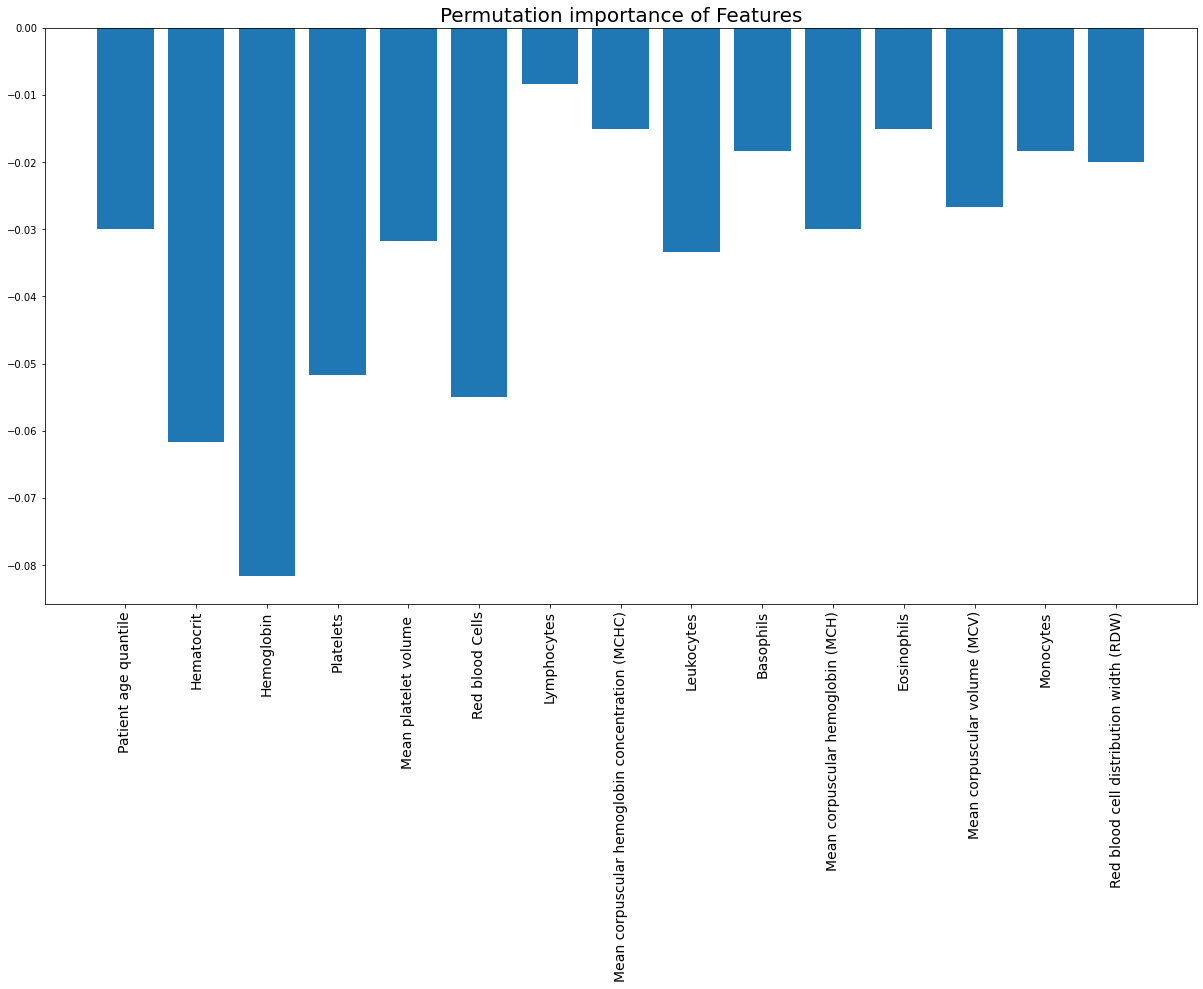

In [20]:
from matplotlib import pyplot
from sklearn.inspection import permutation_importance
imps = permutation_importance(naives_model, X_test, Y_test, scoring='accuracy')
imp = imps.importances_mean
for i,v in zip(Feature,imp):
    print('Feature:',i, 'Score: %.5f' % (v))
# plot feature importance
fig = plt.figure(figsize=(16,8))
ax = fig.add_axes([0,0,1,1])
ax.bar(Feature, imp)
plt.xticks(Feature, rotation='vertical', size=14)
plt.title("Permutation importance of Features", size=20)
plt.show()

In [21]:
x = df_covid[['Leukocytes','Lymphocytes','Eosinophils','Red blood cell distribution width (RDW)' ]].values
y = df_covid[['SARS-Cov-2 exam result']].values

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
print('x_train:',x_train.shape,'\ny_train:',y_train.shape)
print('x_test:',x_test.shape,'\ny_test:',y_test.shape)

x_train: (478, 4) 
y_train: (478, 1)
x_test: (120, 4) 
y_test: (120, 1)


In [23]:
naives_model_1 = GaussianNB()
naives_model_1.fit(x_train,y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
y_hat = naives_model_1.predict(x_test)
y_hat

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [25]:
model_acc_1 = accuracy_score(y_test, y_hat)
print('The accuracy of our naive model is: %0.3f'% model_acc_1)

The accuracy of our naive model is: 0.842


The accuracy of our confusion matrix is:
 [[94 13]
 [ 6  7]]


<Figure size 864x576 with 0 Axes>

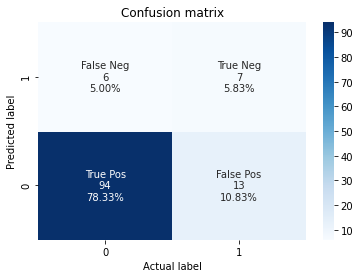

In [26]:
model_conf_1 = confusion_matrix(y_test, y_hat)
print('The accuracy of our confusion matrix is:\n', model_conf_1)
plt.figure(figsize=(12,8))
group_names = ['True Pos','False Pos','False Neg','True Neg']
group_counts = ["{0:0.0f}".format(value) for value in
                model_conf_1.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     model_conf_1.flatten()/np.sum(model_conf_1)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(model_conf_1, annot=labels, fmt='', cmap='Blues')
ax.set_ylim([0,2])
plt.title('Confusion matrix')
plt.xlabel('Actual label')
plt.ylabel('Predicted label')
plt.show()


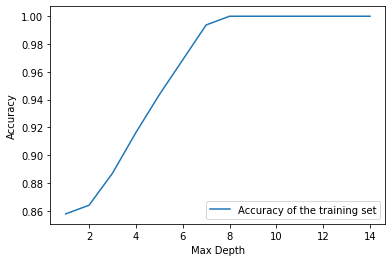

In [29]:
training_accuracy = []
test_accuracy = []
max_dep = range(1,15)

for md in max_dep:
    tree = DecisionTreeClassifier(max_depth=md,random_state=0)
    tree.fit(X_train,y_train)
    training_accuracy.append(tree.score(X_train, y_train))
    test_accuracy.append(tree.score(X_test, y_test))
 
plt.plot(max_dep,training_accuracy, label='Accuracy of the training set')
plt.ylabel('Accuracy')
plt.xlabel('Max Depth')
plt.legend()


In [30]:
tree = DecisionTreeClassifier(max_depth=8,random_state=0)
tree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [33]:
tree.score(X_train, y_train)

1.0

In [34]:
tree.score(X_test, y_test)

0.875

In [36]:
from sklearn.ensemble import RandomForestClassifier
# creating a RF classifier
clf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model on the training dataset
# fit function is used to train the model using the training sets as parameters
clf.fit(X_train, y_train)
  
# performing predictions on the test dataset
y_pred = clf.predict(X_test)
  
# metrics are used to find accuracy or error
from sklearn import metrics  
print()
  
# using metrics module for accuracy calculation
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))


ACCURACY OF THE MODEL:  0.925


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys
